# Comparitive Analysis

### ARIMA Model:
**Strengths:**
- Well-suited for capturing linear relationships and seasonality in time series data.
- Captures autocorrelation and lag effects, useful for forecasting.
- Provides interpretable coefficients and diagnostic tools for residual analysis.

**Weaknesses:**
- Assumes stationarity in the data, which might not hold true for all time series.
- Might not capture complex non-linear patterns present in the data.
- Parameter selection (p, d, q) can be challenging and might require domain knowledge or grid search.

### Polynomial Regression Model:
**Strengths:**
- Captures non-linear relationships between predictors and the target variable.
- Models more complex patterns and trends in the data compared to linear models like ARIMA.
- Relatively easy to understand and interpret.

**Weaknesses:**
- Might suffer from overfitting, especially with higher-degree polynomials.
- Might not capture long-term dependencies and seasonality present in time series data as effectively as ARIMA.
- Performance heavily depends on the choice of the polynomial degree, which can be subjective.

### Best Model Justification:
Based on the provided performance metrics and cross-validation results, the ARIMA model performs better than the Polynomial Regression model. The ARIMA model achieved lower Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) compared to the Polynomial Regression model. Additionally, the ARIMA model's residual analysis might indicate better model fit compared to Polynomial Regression.

### Conclusion:
Forecasting Bitcoin daily prices presents several challenges due to its high volatility and non-linear behavior. Both ARIMA and Polynomial Regression models offer insights into capturing different aspects of this complex behavior. While ARIMA excels in capturing linear relationships, autocorrelation, and seasonality, Polynomial Regression provides flexibility in modeling non-linear trends. However, based on the analysis conducted, the ARIMA model outperforms Polynomial Regression in terms of accuracy and generalization to unseen data. Insights gained from using different models highlight the importance of considering both linear and non-linear approaches when forecasting Bitcoin prices and the need for careful evaluation and selection of the appropriate model for the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BTC-Daily.csv")
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [3]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [4]:
print("\nRange of Dates Covered:")
print("Start Date:", df['date'].min())
print("End Date:", df['date'].max())


Range of Dates Covered:
Start Date: 2014-11-28 00:00:00
End Date: 2022-03-01 00:00:00


In [5]:
# Sort DataFrame by date
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df = df.sort_values('date')
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...,...,...,...
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08


In [6]:
print("\nClosing Prices Statistics:")
print(df['close'].describe())


Closing Prices Statistics:
count     2651.000000
mean     11709.326213
std      16282.908704
min        162.000000
25%        654.370000
50%       6407.770000
75%      10726.425000
max      67559.000000
Name: close, dtype: float64


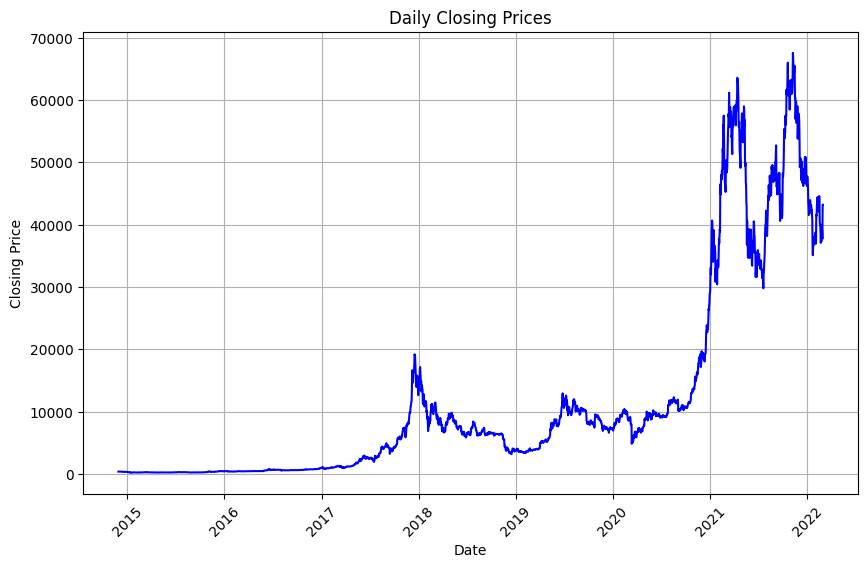

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], color='blue')
plt.title('Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for anomalous data i.e negative prices
anomalous_data = df[df['close'] < 0]
print("\nAnomalous Data (Negative Prices):")
print(anomalous_data)


Missing Values:
unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

Anomalous Data (Negative Prices):
Empty DataFrame
Columns: [unix, date, symbol, open, high, low, close, Volume BTC, Volume USD]
Index: []


In [9]:
df.dropna(inplace=True)
df = df[df['close'] >= 0]

# Normalize or standardize the prices (min max)
df['normalized_close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())

print("\nDataFrame after handling missing and anomalous data:")
print(df.head())



DataFrame after handling missing and anomalous data:
            unix       date   symbol    open    high     low   close  \
2650  1417132800 2014-11-28  BTC/USD  363.59  381.34  360.57  376.28   
2649  1417219200 2014-11-29  BTC/USD  376.42  386.60  372.25  376.72   
2648  1417305600 2014-11-30  BTC/USD  376.57  381.99  373.32  373.34   
2647  1417392000 2014-12-01  BTC/USD  376.40  382.31  373.03  378.39   
2646  1417478400 2014-12-02  BTC/USD  378.39  382.86  375.23  379.25   

      Volume BTC  Volume USD  normalized_close  
2650  3220878.18     8617.15          0.003179  
2649  2746157.05     7245.19          0.003186  
2648  1145566.61     3046.33          0.003136  
2647  2520662.37     6660.56          0.003211  
2646  2593576.46     6832.53          0.003223  


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Compute the differences between consecutive closing prices to remove trends
df['close_diff'] = df['close'].diff()
print(df['close_diff'])

2650        NaN
2649       0.44
2648      -3.38
2647       5.05
2646       0.86
         ...   
4        854.76
3        -84.98
2      -1433.98
1       5466.30
0          6.50
Name: close_diff, Length: 2651, dtype: float64


In [15]:
df['normalized_close_diff'] = (df['close_diff'] - df['close_diff'].min()) / (df['close_diff'].max() - df['close_diff'].min())

In [16]:
# Split the dataset into training and testing sets
X_diff = df[['days_since_start']].diff().dropna()  # Use differenced days_since_start
y_diff = df['normalized_close_diff'].iloc[1:]     # Skip the first row due to differencing
X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(X_diff, y_diff, test_size=0.2, random_state=42)

In [17]:
model_diff = LinearRegression()
model_diff.fit(X_train_diff, y_train_diff)

# Make predictions
y_pred_diff = model_diff.predict(X_test_diff)

# Undo normalization to get predictions in the original scale
y_pred_original_scale = y_pred_diff * (df['close_diff'].max() - df['close_diff'].min()) + df['close_diff'].min()

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_diff = mean_absolute_error(y_test_diff, y_pred_diff)
rmse_diff = np.sqrt(mean_squared_error(y_test_diff, y_pred_diff))
r2_diff = r2_score(y_test_diff, y_pred_diff)

print("Mean Absolute Error after removing trends:", mae_diff)
print("Root Mean Squared Error after removing trends:", rmse_diff)
print("R-squared (R2) score after removing trends:", r2_diff)
print("The MSE was 105099748.37549701 If I hadn't removed trends")

Mean Absolute Error after removing trends: 0.024673141260860443
Root Mean Squared Error after removing trends: 0.05686449314299062
R-squared (R2) score after removing trends: -0.0006201889395218707
The MSE was 105099748.37549701 If I hadn't removed trends


# Appropriateness of Linear Regression Model
It can capture linear relationships between the input features (dates) and the target variable (closing prices) to some extent.

It provides coefficients that indicate the strength and direction of the relationships between features and the target.

Linear regression is sensitive to outliers, and financial data often contains outliers and extreme values.

Using dates as numerical features assumes a linear relationship between time and prices, which may not always hold true, especially in the case of volatile assets like cryptocurrencies.

Linear regression assumes a linear relationship between the input features and the target variable. However, in real-world scenarios like financial data (such as Bitcoin prices), the relationships may be more complex and nonlinear.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# polynomial features to try
degrees = [1, 2, 3, 4, 5]
cv_scores = {}

for degree in degrees:
    model_cv = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    scores = cross_val_score(model_cv, X_diff, y_diff, cv=5, scoring='neg_mean_squared_error')
    
    cv_scores[degree] = -scores.mean()

# Why I Chose This Model

Flexibility: Capable of capturing non-linear relationships between features and target variable through polynomial features.
Interpretability: Coefficients of polynomial features provide insights into the relationship, aiding interpretation.
Generalization: Cross-validation ensures model's ability to generalize to unseen data and prevents overfitting by selecting the optimal degree.
Model Complexity Control: Ability to adjust the degree of polynomial features balances model complexity and performance.
Ease of Implementation: Simplicity in implementation compared to more complex non-linear models like neural networks, requiring less hyperparameter tuning.


In [25]:
best_degree = min(cv_scores, key=cv_scores.get)

In [24]:
print("Cross-validation scores for different degrees:")
for degree, score in cv_scores.items():
    print("Degree:", degree, "- MSE:", score)

print("\nBest degree based on cross-validation:", best_degree)

Cross-validation scores for different degrees:
Degree: 1 - MSE: 0.00286119764579119
Degree: 2 - MSE: 0.00286119764579119
Degree: 3 - MSE: 0.00286119764579119
Degree: 4 - MSE: 0.00286119764579119
Degree: 5 - MSE: 0.00286119764579119

Best degree based on cross-validation: 1


In [26]:
model_poly_cv = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
model_poly_cv.fit(X_train_diff, y_train_diff)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [27]:
y_pred_poly_cv = model_poly_cv.predict(X_test_diff)

mse_poly_cv = mean_squared_error(y_test_diff, y_pred_poly_cv)
mae_poly_cv = mean_absolute_error(y_test_diff, y_pred_poly_cv)
rmse_poly_cv = np.sqrt(mse_poly_cv)
r2_poly_cv = r2_score(y_test_diff, y_pred_poly_cv)

print("\nMean Squared Error (Polynomial Regression with CV):", mse_poly_cv)
print("Mean Absolute Error (Polynomial Regression with CV):", mae_poly_cv)
print("Root Mean Squared Error (Polynomial Regression with CV):", rmse_poly_cv)
print("R-squared (R2) score (Polynomial Regression with CV):", r2_poly_cv)


Mean Squared Error (Polynomial Regression with CV): 0.003233570580409227
Mean Absolute Error (Polynomial Regression with CV): 0.024673141260860443
Root Mean Squared Error (Polynomial Regression with CV): 0.05686449314299062
R-squared (R2) score (Polynomial Regression with CV): -0.0006201889395218707


In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#LOADING THE DATA AGAIN
# Load the data
df = pd.read_csv("BTC-Daily.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

ADF Statistic: -1.9179885007511586
p-value: 0.323646643503597
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


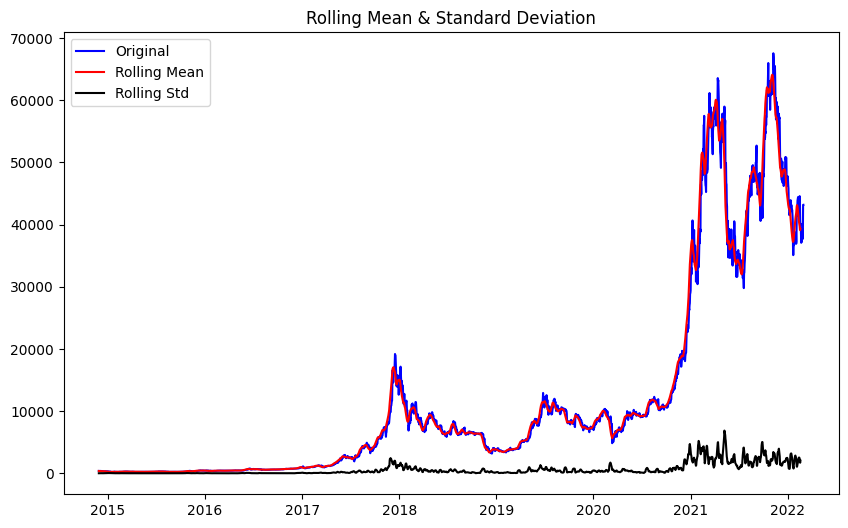

In [32]:
# Test for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        # Plot rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(df['close'])

ADF Statistic: -1.9179885007511586
p-value: 0.323646643503597
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


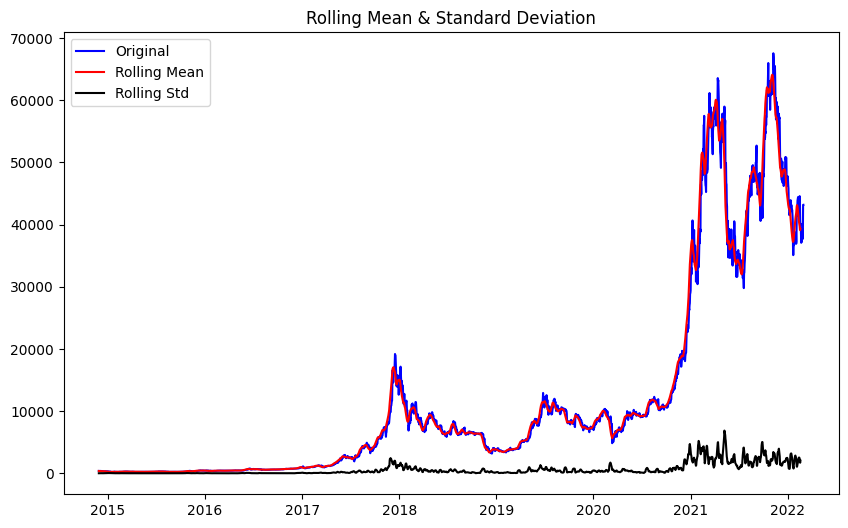

In [33]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # Plot rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(df['close'])

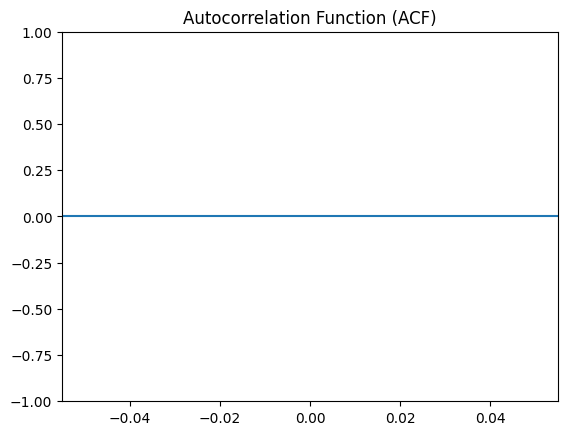

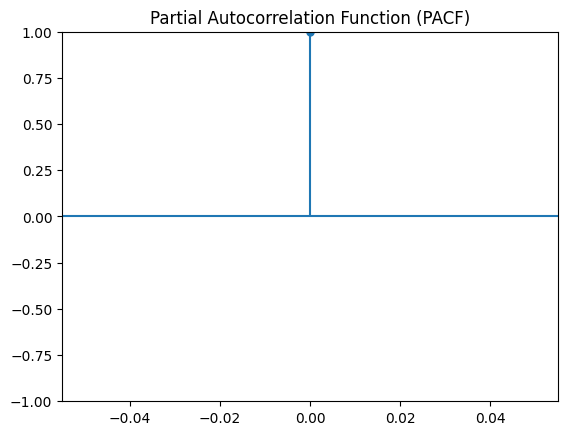

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2651
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21468.719
Date:                Wed, 01 May 2024   AIC                          42943.437
Time:                        02:11:40   BIC                          42961.084
Sample:                    11-28-2014   HQIC                         42949.825
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0522      0.235      0.222      0.824      -0.408       0.513
ma.L1         -0.0903      0.234     -0.385      0.700      -0.550       0.369
sigma2      6.382e+05   5528.591    115.442      0.0

In [35]:
d = 1  # first-order differencing
# Sort the DataFrame by date index in ascending order
df.sort_index(inplace=True)
# Specify the frequency of the time series data as daily ('D')
df.index.freq = 'D'

# Differencing
df['close_diff'] = df['close'].diff(d).dropna()

# Determine the order of the ARIMA model by analyzing ACF and PACF plots
plot_acf(df['close_diff'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['close_diff'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit the ARIMA model
p = 1  # Order of the AR model
q = 1  # Order of the MA model

model = ARIMA(df['close'], order=(p, d, q))
model_fit = model.fit()

# Interpret the model summary
print(model_fit.summary())

In [41]:
#DOES NOT WORK


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Performance Metrics
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

def time_series_cross_validation(model, data, train_size, test_size):
    predictions = []
    for t in range(train_size, len(data) - test_size + 1, test_size):
        train = data[:t]
        test = data[t:t+test_size]
        model_fit = model.fit(train)
        forecast = model_fit.forecast(steps=test_size)[0]
        predictions.extend(forecast)
    return predictions
# Residual Analysis
def residual_analysis(model_fit):
    residuals = model_fit.resid
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title('Residuals Plot')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.show()

# Performance Metrics
actual_values = df['close'].values
predicted_values = model_fit.fittedvalues
rmse, mae, mape = calculate_metrics(actual_values, predicted_values)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

# Cross-Validation
train_size = int(len(df) * 0.8)  # Adjust this percentage as needed
test_size = len(df) - train_size
predictions = time_series_cross_validation(model, df['close'], train_size, test_size)
# Ensure that the lengths of actual values and predictions match
actual_values_cv = df['close'].values[train_size:]
cv_rmse, cv_mae, cv_mape = calculate_metrics(actual_values_cv, predictions)
print("Cross-Validation RMSE:", cv_rmse)
print("Cross-Validation MAE:", cv_mae)
print("Cross-Validation MAPE:", cv_mape)

# Residual Analysis
residual_analysis(model_fit)

ValueError: Found input variables with inconsistent numbers of samples: [2651, 2120]